<a href="https://colab.research.google.com/github/maisagerk/PerfilParticipantes/blob/main/Perfil_de_Aloca%C3%A7%C3%A3o_dos_Participantes_vfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from numpy import unique
from numpy import where
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
pd.set_option('max_rows', 99999)

###Importação dos Dados

#### Grupo de Participantes

In [2]:
grupo = pd.read_csv('grupo.csv', delimiter= ";",  usecols=[0,1,2,3,4,5], engine='python', encoding='latin-1')

grupo['DtNascimento']= pd.to_datetime(grupo['DtNascimento'],dayfirst= True )
grupo['DtIncricaoPlano']= pd.to_datetime(grupo['DtIncricaoPlano'],dayfirst= True )

grupo.head()

,ID,DtNascimento,Sexo,Escolaridade,FaixaSalarial,DtIncricaoPlano
0,1,1976-01-30,M,Superior Completo,L2,2012-05-16
1,2,1978-10-30,M,Superior Completo,L1,2012-02-03
2,3,1975-11-13,F,Superior Completo,L1,2011-04-12
3,4,1955-06-02,M,Superior Completo,L1,1984-06-25
4,5,1971-03-17,F,Superior Completo,L1,2006-03-07


###### Tratamento dos Dados

In [3]:
print(grupo.isnull().any())

ID                 False
DtNascimento       False
Sexo               False
Escolaridade       False
FaixaSalarial      False
DtIncricaoPlano    False
dtype: bool


In [4]:
 print(grupo.shape[0])

6044


In [5]:
grupo['Escolaridade'].value_counts(normalize=True)

Superior Completo      0.635341
2o. Grau Completo      0.217075
Pos-Graduacao          0.095963
Superior Incompleto    0.036400
Mestrado               0.007280
2o. Grau Incompleto    0.006618
1o. Grau Completo      0.001324
Name: Escolaridade, dtype: float64

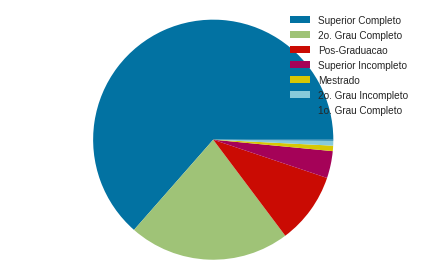

In [6]:
plt.pie(grupo.Escolaridade.value_counts());
plt.legend(labels=grupo['Escolaridade'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [7]:
grupo.FaixaSalarial.value_counts()

L2    4260
L3    1282
L1     502
Name: FaixaSalarial, dtype: int64

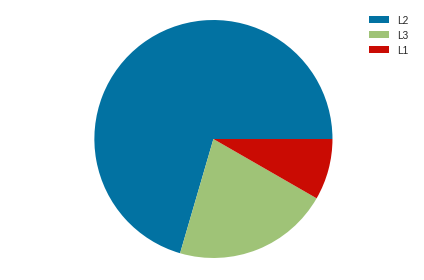

In [8]:
plt.pie(grupo.FaixaSalarial.value_counts());
plt.legend(labels=grupo['FaixaSalarial'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [9]:
grupo.Sexo.value_counts(normalize=True)

M    0.731635
F    0.268365
Name: Sexo, dtype: float64

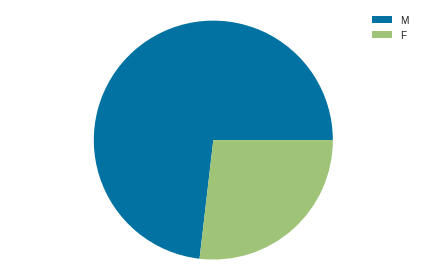

In [10]:
plt.pie(grupo.Sexo.value_counts());
plt.legend(labels=grupo['Sexo'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

###### Criando tabela Grupo com colunas Dummy

In [11]:
grupo_clean = grupo [['ID', 'Sexo','Escolaridade','FaixaSalarial']]
grupo_clean.head(5)

,ID,Sexo,Escolaridade,FaixaSalarial
0,1,M,Superior Completo,L2
1,2,M,Superior Completo,L1
2,3,F,Superior Completo,L1
3,4,M,Superior Completo,L1
4,5,F,Superior Completo,L1


In [12]:
grupo_M = grupo_clean[grupo.Sexo == 'M']

lista_M = [1]*len(grupo_M)
lista_F = [0]*len(grupo_M)

grupo_M['M'] = lista_M
grupo_M['F'] = lista_F

grupo_M = grupo_M [['ID', 'M', 'F']]

grupo_Dummies_MF = pd.merge(grupo_clean,grupo_M, how='left', on='ID')

grupo_Dummies_MF["F"].fillna(value=1, inplace=True)
grupo_Dummies_MF["M"].fillna(value=0, inplace=True)

grupo_Dummies_MF = grupo_Dummies_MF.drop(columns=['Sexo'])
grupo_Dummies_MF.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,ID,Escolaridade,FaixaSalarial,M,F
0,1,Superior Completo,L2,1.0,0.0
1,2,Superior Completo,L1,1.0,0.0
2,3,Superior Completo,L1,0.0,1.0
3,4,Superior Completo,L1,1.0,0.0
4,5,Superior Completo,L1,0.0,1.0


In [13]:
print(grupo_Dummies_MF.isnull().any())

ID               False
Escolaridade     False
FaixaSalarial    False
M                False
F                False
dtype: bool


In [14]:
grupo_SupCompl = grupo_clean[grupo_clean.Escolaridade == 'Superior Completo']

lista_SupCompl = [1]*len(grupo_SupCompl);

grupo_SupCompl['SuperiorCompleto'] = lista_SupCompl;

grupo_SupCompl = grupo_SupCompl [['ID', 'SuperiorCompleto']]


grupo_Dummies_SupCompl = pd.merge(grupo_Dummies_MF,grupo_SupCompl, how='left', on='ID')

grupo_Dummies_SupCompl["SuperiorCompleto"].fillna(value=0, inplace=True)

grupo_Dummies_SupCompl.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Escolaridade,FaixaSalarial,M,F,SuperiorCompleto
0,1,Superior Completo,L2,1.0,0.0,1.0
1,2,Superior Completo,L1,1.0,0.0,1.0
2,3,Superior Completo,L1,0.0,1.0,1.0
3,4,Superior Completo,L1,1.0,0.0,1.0
4,5,Superior Completo,L1,0.0,1.0,1.0


In [15]:
grupo_SegGrauCompl = grupo_clean[grupo_clean.Escolaridade == '2o. Grau Completo']

lista_SegGrauCompl = [1]*len(grupo_SegGrauCompl)

grupo_SegGrauCompl['SegGrauCompleto'] = lista_SegGrauCompl

grupo_SegGrauCompl = grupo_SegGrauCompl [['ID', 'SegGrauCompleto']]


grupo_Dummies_SegGrauCompl = pd.merge(grupo_Dummies_SupCompl,grupo_SegGrauCompl, how='left', on='ID')

grupo_Dummies_SegGrauCompl["SegGrauCompleto"].fillna(value=0, inplace=True)

grupo_Dummies_SegGrauCompl.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Escolaridade,FaixaSalarial,M,F,SuperiorCompleto,SegGrauCompleto
0,1,Superior Completo,L2,1.0,0.0,1.0,0.0
1,2,Superior Completo,L1,1.0,0.0,1.0,0.0
2,3,Superior Completo,L1,0.0,1.0,1.0,0.0
3,4,Superior Completo,L1,1.0,0.0,1.0,0.0
4,5,Superior Completo,L1,0.0,1.0,1.0,0.0


In [16]:
grupo_PosGrad = grupo_clean[grupo_clean.Escolaridade == 'Pos-Graduacao']

lista_PosGrad = [1]*len(grupo_PosGrad)

grupo_PosGrad['PosGraduacao'] = lista_PosGrad

grupo_PosGrad = grupo_PosGrad [['ID', 'PosGraduacao']]


grupo_Dummies_PosGrad = pd.merge(grupo_Dummies_SegGrauCompl,grupo_PosGrad, how='left', on='ID')

grupo_Dummies_PosGrad["PosGraduacao"].fillna(value=0, inplace=True)

grupo_Dummies_PosGrad.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Escolaridade,FaixaSalarial,M,F,SuperiorCompleto,SegGrauCompleto,PosGraduacao
0,1,Superior Completo,L2,1.0,0.0,1.0,0.0,0.0
1,2,Superior Completo,L1,1.0,0.0,1.0,0.0,0.0
2,3,Superior Completo,L1,0.0,1.0,1.0,0.0,0.0
3,4,Superior Completo,L1,1.0,0.0,1.0,0.0,0.0
4,5,Superior Completo,L1,0.0,1.0,1.0,0.0,0.0


In [17]:
grupo_SupInc = grupo_clean[grupo_clean.Escolaridade == 'Superior Incompleto']

lista_SupInc = [1]*len(grupo_SupInc)

grupo_SupInc['SuperiorIncompleto'] = lista_SupInc

grupo_SupInc = grupo_SupInc [['ID', 'SuperiorIncompleto']]


grupo_Dummies_SupInc = pd.merge(grupo_Dummies_PosGrad,grupo_SupInc, how='left', on='ID')

grupo_Dummies_SupInc["SuperiorIncompleto"].fillna(value=0, inplace=True)

grupo_Dummies_SupInc.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Escolaridade,FaixaSalarial,M,F,SuperiorCompleto,SegGrauCompleto,PosGraduacao,SuperiorIncompleto
0,1,Superior Completo,L2,1.0,0.0,1.0,0.0,0.0,0.0
1,2,Superior Completo,L1,1.0,0.0,1.0,0.0,0.0,0.0
2,3,Superior Completo,L1,0.0,1.0,1.0,0.0,0.0,0.0
3,4,Superior Completo,L1,1.0,0.0,1.0,0.0,0.0,0.0
4,5,Superior Completo,L1,0.0,1.0,1.0,0.0,0.0,0.0


In [18]:
grupo_Mestrado = grupo_clean[grupo_clean.Escolaridade == 'Mestrado']

lista_Mestrado = [1]*len(grupo_Mestrado)

grupo_Mestrado['Mestrado'] = lista_Mestrado

grupo_Mestrado = grupo_Mestrado [['ID', 'Mestrado']]


grupo_Dummies_Mestrado = pd.merge(grupo_Dummies_SupInc,grupo_Mestrado, how='left', on='ID')

grupo_Dummies_Mestrado["Mestrado"].fillna(value=0, inplace=True)

grupo_Dummies_Mestrado.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Escolaridade,FaixaSalarial,M,F,SuperiorCompleto,SegGrauCompleto,PosGraduacao,SuperiorIncompleto,Mestrado
0,1,Superior Completo,L2,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,Superior Completo,L1,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,Superior Completo,L1,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,4,Superior Completo,L1,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,Superior Completo,L1,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [19]:
grupo_SegGrauInc = grupo_clean[grupo_clean.Escolaridade == '2o. Grau Incompleto']

lista_SegGrauInc = [1]*len(grupo_SegGrauInc)

grupo_SegGrauInc['SegGrauIncompleto'] = lista_SegGrauInc

grupo_SegGrauInc = grupo_SegGrauInc [['ID', 'SegGrauIncompleto']]


grupo_Dummies_SegGrauInc = pd.merge(grupo_Dummies_Mestrado,grupo_SegGrauInc, how='left', on='ID')

grupo_Dummies_SegGrauInc["SegGrauIncompleto"].fillna(value=0, inplace=True)

grupo_Dummies_SegGrauInc.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Escolaridade,FaixaSalarial,M,F,SuperiorCompleto,SegGrauCompleto,PosGraduacao,SuperiorIncompleto,Mestrado,SegGrauIncompleto
0,1,Superior Completo,L2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,Superior Completo,L1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,Superior Completo,L1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,Superior Completo,L1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,Superior Completo,L1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
grupo_PrimGrauComp = grupo_clean[grupo_clean.Escolaridade == '1o. Grau Completo']

lista_PrimGrauComp = [1]*len(grupo_PrimGrauComp)

grupo_PrimGrauComp['PrimGrauCompleto'] = lista_PrimGrauComp

grupo_PrimGrauComp = grupo_PrimGrauComp [['ID', 'PrimGrauCompleto']]


grupo_Dummies_PrimGrauComp = pd.merge(grupo_Dummies_SegGrauInc,grupo_PrimGrauComp, how='left', on='ID')

grupo_Dummies_PrimGrauComp["PrimGrauCompleto"].fillna(value=0, inplace=True)

grupo_Dummies_PrimGrauComp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Escolaridade,FaixaSalarial,M,F,SuperiorCompleto,SegGrauCompleto,PosGraduacao,SuperiorIncompleto,Mestrado,SegGrauIncompleto,PrimGrauCompleto
0,1,Superior Completo,L2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Superior Completo,L1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Superior Completo,L1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Superior Completo,L1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Superior Completo,L1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
grupo_Dummies_Escola = grupo_Dummies_PrimGrauComp.drop(columns=['Escolaridade'])
grupo_Dummies_Escola.head()

,ID,FaixaSalarial,M,F,SuperiorCompleto,SegGrauCompleto,PosGraduacao,SuperiorIncompleto,Mestrado,SegGrauIncompleto,PrimGrauCompleto
0,1,L2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,L1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,L1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,L1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,L1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
print(grupo_Dummies_Escola.isnull().any())

ID                    False
FaixaSalarial         False
M                     False
F                     False
SuperiorCompleto      False
SegGrauCompleto       False
PosGraduacao          False
SuperiorIncompleto    False
Mestrado              False
SegGrauIncompleto     False
PrimGrauCompleto      False
dtype: bool


In [23]:
grupo_L1 = grupo_clean[grupo_clean.FaixaSalarial == 'L1']

lista = [1]*len(grupo_L1)

grupo_L1['L1'] = lista

grupo_L1 = grupo_L1 [['ID', 'L1']]


grupo_Dummies_L1 = pd.merge(grupo_Dummies_Escola,grupo_L1, how='left', on='ID')

grupo_Dummies_L1["L1"].fillna(value=0, inplace=True)

grupo_Dummies_L1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,FaixaSalarial,M,F,SuperiorCompleto,SegGrauCompleto,PosGraduacao,SuperiorIncompleto,Mestrado,SegGrauIncompleto,PrimGrauCompleto,L1
0,1,L2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,L1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,L1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,L1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,L1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
grupo_L2 = grupo_clean[grupo_clean.FaixaSalarial == 'L2']

lista = [1]*len(grupo_L2)

grupo_L2['L2'] = lista

grupo_L2 = grupo_L2 [['ID', 'L2']]


grupo_Dummies_L2 = pd.merge(grupo_Dummies_L1, grupo_L2, how='left', on='ID')

grupo_Dummies_L2["L2"].fillna(value=0, inplace=True)

grupo_Dummies_L2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,FaixaSalarial,M,F,SuperiorCompleto,SegGrauCompleto,PosGraduacao,SuperiorIncompleto,Mestrado,SegGrauIncompleto,PrimGrauCompleto,L1,L2
0,1,L2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,L1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,L1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,L1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,L1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
grupo_L3 = grupo_clean[grupo_clean.FaixaSalarial == 'L3']

lista = [1]*len(grupo_L3)

grupo_L3['L3'] = lista

grupo_L3 = grupo_L3 [['ID', 'L3']]


grupo_Dummies_L3 = pd.merge(grupo_Dummies_L2, grupo_L3, how='left', on='ID')

grupo_Dummies_L3["L3"].fillna(value=0, inplace=True)

grupo_Dummies_L3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,FaixaSalarial,M,F,SuperiorCompleto,SegGrauCompleto,PosGraduacao,SuperiorIncompleto,Mestrado,SegGrauIncompleto,PrimGrauCompleto,L1,L2,L3
0,1,L2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,L1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,L1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,L1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,L1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
grupo_Dummies = grupo_Dummies_L3.drop(columns=['FaixaSalarial'])
grupo_Dummies.head()

,ID,M,F,SuperiorCompleto,SegGrauCompleto,PosGraduacao,SuperiorIncompleto,Mestrado,SegGrauIncompleto,PrimGrauCompleto,L1,L2,L3
0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
print(grupo_Dummies.isnull().any())

ID                    False
M                     False
F                     False
SuperiorCompleto      False
SegGrauCompleto       False
PosGraduacao          False
SuperiorIncompleto    False
Mestrado              False
SegGrauIncompleto     False
PrimGrauCompleto      False
L1                    False
L2                    False
L3                    False
dtype: bool


#### Dependentes dos Participantes

In [28]:
dependentes_raw = pd.read_csv('dependentes.csv', delimiter= ";", engine='python', encoding='latin-1')

dependentes_raw.head()

,ID,Parentesco,DtNascimento
0,1,Pai ou Mae,26/07/1945
1,1,Companheiro(a),28/08/1980
2,2,Conjuge,03/07/1975
3,2,Filho(a),03/07/2009
4,4,Pai ou Mae,07/11/1927


In [29]:
dependentes_raw['DtNascimento']= pd.to_datetime(dependentes_raw['DtNascimento'],dayfirst= True,errors='coerce')

###### Tratamento dos Dados

In [30]:
print(dependentes_raw.isnull().any())

ID              False
Parentesco      False
DtNascimento     True
dtype: bool


In [31]:
dependentes_clean=dependentes_raw.dropna()
print(dependentes_clean.isnull().any())
dependentes_clean.head()

ID              False
Parentesco      False
DtNascimento    False
dtype: bool


,ID,Parentesco,DtNascimento
0,1,Pai ou Mae,1945-07-26
1,1,Companheiro(a),1980-08-28
2,2,Conjuge,1975-07-03
3,2,Filho(a),2009-07-03
4,4,Pai ou Mae,1927-11-07


In [32]:
dependentes = dependentes_clean
dependentes.head()

,ID,Parentesco,DtNascimento
0,1,Pai ou Mae,1945-07-26
1,1,Companheiro(a),1980-08-28
2,2,Conjuge,1975-07-03
3,2,Filho(a),2009-07-03
4,4,Pai ou Mae,1927-11-07


In [33]:
print(dependentes.shape[0])

16204


In [34]:
dependentes.loc[dependentes['Parentesco'].str.contains('Filho'),'Parentesco'] = 'Filho(a)'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [35]:
dependentes_inconsistencias=[]
for index, row in dependentes.iterrows():
  if index== 0:
    id= row['ID']
    parente= row['Parentesco']
    dtnasc= row['DtNascimento']
    
  else:
    if row['ID']==id and row['Parentesco'] == parente and row['DtNascimento']==dtnasc:
      dependentes_inconsistencias.append(index)

    id= row['ID']
    parente= row['Parentesco']
    dtnasc= row['DtNascimento']
    
dependentes = dependentes.drop(dependentes_inconsistencias)

In [36]:
dependentes.Parentesco.value_counts(normalize=True)

Filho(a)             0.327802
Pai ou Mae           0.261811
Conjuge              0.229639
Irmao ou Irma        0.106143
Designado            0.039139
Companheiro(a)       0.027739
Enteado(a)           0.004053
Ex-Conjuge           0.001520
Sogro(a)             0.001330
Menor sob Guarda     0.000443
Ex-Companheiro(a)    0.000380
Name: Parentesco, dtype: float64

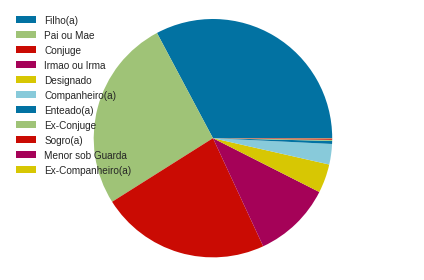

In [37]:
plt.pie(dependentes.Parentesco.value_counts());
plt.legend(labels=dependentes['Parentesco'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

###### Criando tabela Dependentes com colunas Dummy

In [38]:
dependentes_Filhx = dependentes[dependentes.Parentesco == 'Filho(a)']

lista = [1]*len(dependentes_Filhx)

dependentes_Filhx['Filhx'] = lista

dependentes_Filhx = dependentes_Filhx [['ID', 'Filhx','Parentesco']]


dependentes_Dummies_Filhx = pd.merge(dependentes,dependentes_Filhx, how='left', on=['ID','Parentesco'])

dependentes_Dummies_Filhx["Filhx"].fillna(value=0, inplace=True)

dependentes_Dummies_Filhx.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Parentesco,DtNascimento,Filhx
0,1,Pai ou Mae,1945-07-26,0.0
1,1,Companheiro(a),1980-08-28,0.0
2,2,Conjuge,1975-07-03,0.0
3,2,Filho(a),2009-07-03,1.0
4,4,Pai ou Mae,1927-11-07,0.0


In [39]:
dependentes_PaiMae = dependentes[dependentes.Parentesco == 'Pai ou Mae']

lista = [1]*len(dependentes_PaiMae)

dependentes_PaiMae['PaiMae'] = lista

dependentes_PaiMae = dependentes_PaiMae [['ID', 'PaiMae','Parentesco']]


dependentes_Dummies_PaiMae = pd.merge(dependentes_Dummies_Filhx,dependentes_PaiMae, how='left', on=['ID','Parentesco'])

dependentes_Dummies_PaiMae["PaiMae"].fillna(value=0, inplace=True)

dependentes_Dummies_PaiMae.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Parentesco,DtNascimento,Filhx,PaiMae
0,1,Pai ou Mae,1945-07-26,0.0,1.0
1,1,Companheiro(a),1980-08-28,0.0,0.0
2,2,Conjuge,1975-07-03,0.0,0.0
3,2,Filho(a),2009-07-03,1.0,0.0
4,4,Pai ou Mae,1927-11-07,0.0,1.0


In [40]:
dependentes_Conjuge = dependentes[dependentes.Parentesco == 'Conjuge']

lista = [1]*len(dependentes_Conjuge)

dependentes_Conjuge['Conjuge'] = lista

dependentes_Conjuge = dependentes_Conjuge [['ID', 'Conjuge','Parentesco']]


dependentes_Dummies_Conjuge = pd.merge(dependentes_Dummies_PaiMae,dependentes_Conjuge, how='left', on=['ID','Parentesco'])

dependentes_Dummies_Conjuge["Conjuge"].fillna(value=0, inplace=True)

dependentes_Dummies_Conjuge.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Parentesco,DtNascimento,Filhx,PaiMae,Conjuge
0,1,Pai ou Mae,1945-07-26,0.0,1.0,0.0
1,1,Companheiro(a),1980-08-28,0.0,0.0,0.0
2,2,Conjuge,1975-07-03,0.0,0.0,1.0
3,2,Filho(a),2009-07-03,1.0,0.0,0.0
4,4,Pai ou Mae,1927-11-07,0.0,1.0,0.0


In [41]:
dependentes_Irmx = dependentes[dependentes.Parentesco == 'Irmx']

lista = [1]*len(dependentes_Irmx)

dependentes_Irmx['Irmx'] = lista

dependentes_Irmx = dependentes_Irmx [['ID', 'Irmx','Parentesco']]


dependentes_Dummies_Irmx = pd.merge(dependentes_Dummies_Conjuge,dependentes_Irmx, how='left', on=['ID','Parentesco'])

dependentes_Dummies_Irmx["Irmx"].fillna(value=0, inplace=True)

dependentes_Dummies_Irmx.head()

,ID,Parentesco,DtNascimento,Filhx,PaiMae,Conjuge,Irmx
0,1,Pai ou Mae,1945-07-26,0.0,1.0,0.0,0.0
1,1,Companheiro(a),1980-08-28,0.0,0.0,0.0,0.0
2,2,Conjuge,1975-07-03,0.0,0.0,1.0,0.0
3,2,Filho(a),2009-07-03,1.0,0.0,0.0,0.0
4,4,Pai ou Mae,1927-11-07,0.0,1.0,0.0,0.0


In [42]:
dependentes_Designado = dependentes[dependentes.Parentesco == 'Designado']

lista = [1]*len(dependentes_Designado)

dependentes_Designado['Designado'] = lista

dependentes_Designado = dependentes_Designado [['ID', 'Designado','Parentesco']]


dependentes_Dummies_Designado = pd.merge(dependentes_Dummies_Irmx,dependentes_Designado, how='left', on=['ID','Parentesco'])

dependentes_Dummies_Designado["Designado"].fillna(value=0, inplace=True)

dependentes_Dummies_Designado.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Parentesco,DtNascimento,Filhx,PaiMae,Conjuge,Irmx,Designado
0,1,Pai ou Mae,1945-07-26,0.0,1.0,0.0,0.0,0.0
1,1,Companheiro(a),1980-08-28,0.0,0.0,0.0,0.0,0.0
2,2,Conjuge,1975-07-03,0.0,0.0,1.0,0.0,0.0
3,2,Filho(a),2009-07-03,1.0,0.0,0.0,0.0,0.0
4,4,Pai ou Mae,1927-11-07,0.0,1.0,0.0,0.0,0.0


In [43]:
dependentes_Companheirx = dependentes[dependentes.Parentesco == 'Companheiro(a)']

lista = [1]*len(dependentes_Companheirx)

dependentes_Companheirx['Companheirx'] = lista

dependentes_Companheirx = dependentes_Companheirx [['ID', 'Companheirx','Parentesco']]


dependentes_Dummies_Companheirx = pd.merge(dependentes_Dummies_Designado,dependentes_Companheirx, how='left', on=['ID','Parentesco'])

dependentes_Dummies_Companheirx["Companheirx"].fillna(value=0, inplace=True)

dependentes_Dummies_Companheirx.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Parentesco,DtNascimento,Filhx,PaiMae,Conjuge,Irmx,Designado,Companheirx
0,1,Pai ou Mae,1945-07-26,0.0,1.0,0.0,0.0,0.0,0.0
1,1,Companheiro(a),1980-08-28,0.0,0.0,0.0,0.0,0.0,1.0
2,2,Conjuge,1975-07-03,0.0,0.0,1.0,0.0,0.0,0.0
3,2,Filho(a),2009-07-03,1.0,0.0,0.0,0.0,0.0,0.0
4,4,Pai ou Mae,1927-11-07,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
dependentes_Enteadx = dependentes[dependentes.Parentesco == 'Enteado(a)']

lista = [1]*len(dependentes_Enteadx)

dependentes_Enteadx['Enteadx'] = lista

dependentes_Enteadx = dependentes_Enteadx [['ID', 'Enteadx','Parentesco']]


dependentes_Dummies_Enteadx = pd.merge(dependentes_Dummies_Companheirx,dependentes_Enteadx, how='left', on=['ID','Parentesco'])

dependentes_Dummies_Enteadx["Enteadx"].fillna(value=0, inplace=True)

dependentes_Dummies_Enteadx.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Parentesco,DtNascimento,Filhx,PaiMae,Conjuge,Irmx,Designado,Companheirx,Enteadx
0,1,Pai ou Mae,1945-07-26,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,Companheiro(a),1980-08-28,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,Conjuge,1975-07-03,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2,Filho(a),2009-07-03,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Pai ou Mae,1927-11-07,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [45]:
dependentes_ExConj = dependentes[dependentes.Parentesco == 'Ex-Conjuge']

lista = [1]*len(dependentes_ExConj)

dependentes_ExConj['ExConjuge'] = lista

dependentes_ExConj = dependentes_ExConj [['ID', 'ExConjuge','Parentesco']]


dependentes_Dummies_ExConj = pd.merge(dependentes_Dummies_Enteadx,dependentes_ExConj, how='left', on=['ID','Parentesco'])

dependentes_Dummies_ExConj["ExConjuge"].fillna(value=0, inplace=True)

dependentes_Dummies_ExConj.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Parentesco,DtNascimento,Filhx,PaiMae,Conjuge,Irmx,Designado,Companheirx,Enteadx,ExConjuge
0,1,Pai ou Mae,1945-07-26,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Companheiro(a),1980-08-28,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,Conjuge,1975-07-03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2,Filho(a),2009-07-03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Pai ou Mae,1927-11-07,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
dependentes_Sogrx = dependentes[dependentes.Parentesco == 'Sogro(a)']

lista = [1]*len(dependentes_Sogrx)

dependentes_Sogrx['Sogrx'] = lista

dependentes_Sogrx = dependentes_Sogrx [['ID', 'Sogrx','Parentesco']]


dependentes_Dummies_Sogrx = pd.merge(dependentes_Dummies_ExConj,dependentes_Sogrx, how='left', on=['ID','Parentesco'])

dependentes_Dummies_Sogrx["Sogrx"].fillna(value=0, inplace=True)

dependentes_Dummies_Sogrx.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Parentesco,DtNascimento,Filhx,PaiMae,Conjuge,Irmx,Designado,Companheirx,Enteadx,ExConjuge,Sogrx
0,1,Pai ou Mae,1945-07-26,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Companheiro(a),1980-08-28,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,Conjuge,1975-07-03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,Filho(a),2009-07-03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Pai ou Mae,1927-11-07,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
dependentes_MenorSobGuarda = dependentes[dependentes.Parentesco == 'Menor sob Guarda']

lista = [1]*len(dependentes_MenorSobGuarda)

dependentes_MenorSobGuarda['MenorSobGuarda'] = lista

dependentes_MenorSobGuarda = dependentes_MenorSobGuarda [['ID', 'MenorSobGuarda','Parentesco']]


dependentes_Dummies_MenorSobGuarda = pd.merge(dependentes_Dummies_Sogrx,dependentes_MenorSobGuarda, how='left', on=['ID','Parentesco'])

dependentes_Dummies_MenorSobGuarda["MenorSobGuarda"].fillna(value=0, inplace=True)

dependentes_Dummies_MenorSobGuarda.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Parentesco,DtNascimento,Filhx,PaiMae,Conjuge,Irmx,Designado,Companheirx,Enteadx,ExConjuge,Sogrx,MenorSobGuarda
0,1,Pai ou Mae,1945-07-26,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Companheiro(a),1980-08-28,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,Conjuge,1975-07-03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,Filho(a),2009-07-03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Pai ou Mae,1927-11-07,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
dependentes_ExComp = dependentes[dependentes.Parentesco == 'Ex-Companheiro(a)']

lista = [1]*len(dependentes_ExComp)

dependentes_ExComp['ExCompanheirx'] = lista

dependentes_ExComp = dependentes_ExComp [['ID', 'ExCompanheirx','Parentesco']]


dependentes_Dummies_ExComp = pd.merge(dependentes_Dummies_MenorSobGuarda,dependentes_ExComp, how='left', on=['ID','Parentesco'])

dependentes_Dummies_ExComp["ExCompanheirx"].fillna(value=0, inplace=True)

dependentes_Dummies_ExComp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Parentesco,DtNascimento,Filhx,PaiMae,Conjuge,Irmx,Designado,Companheirx,Enteadx,ExConjuge,Sogrx,MenorSobGuarda,ExCompanheirx
0,1,Pai ou Mae,1945-07-26,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Companheiro(a),1980-08-28,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Conjuge,1975-07-03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,Filho(a),2009-07-03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Pai ou Mae,1927-11-07,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
dependentes_Dummies = dependentes_Dummies_ExComp.drop(columns=['Parentesco'])
dependentes_Dummies.head()

,ID,DtNascimento,Filhx,PaiMae,Conjuge,Irmx,Designado,Companheirx,Enteadx,ExConjuge,Sogrx,MenorSobGuarda,ExCompanheirx
0,1,1945-07-26,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1980-08-28,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,1975-07-03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2009-07-03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1927-11-07,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
print(dependentes_Dummies.isnull().any())

ID                False
DtNascimento      False
Filhx             False
PaiMae            False
Conjuge           False
Irmx              False
Designado         False
Companheirx       False
Enteadx           False
ExConjuge         False
Sogrx             False
MenorSobGuarda    False
ExCompanheirx     False
dtype: bool


#### Histórico de Contribuição dos Participantes

In [51]:
historicoctb = pd.read_csv('historico ctb.csv', delimiter= ";", engine='python',decimal=',')

historicoctb['DtVigencia']= pd.to_datetime(historicoctb['DtVigencia'],dayfirst= True)

historicoctb.head()

,ID,DtVigencia,CtbBasica,CtbAdicional
0,1,2012-05-16,4.0,0.0
1,2,2012-02-03,8.0,0.0
2,3,2011-04-12,5.0,0.0
3,4,1999-01-01,8.0,0.0
4,4,2004-01-01,8.0,4.0


In [52]:
sum_column = historicoctb["CtbBasica"] + historicoctb["CtbAdicional"]
historicoctb["Contribuicao"] = sum_column
historicoctb.head()

,ID,DtVigencia,CtbBasica,CtbAdicional,Contribuicao
0,1,2012-05-16,4.0,0.0,4.0
1,2,2012-02-03,8.0,0.0,8.0
2,3,2011-04-12,5.0,0.0,5.0
3,4,1999-01-01,8.0,0.0,8.0
4,4,2004-01-01,8.0,4.0,12.0


###### Tratamento dos Dados

In [53]:
print(historicoctb.isnull().any())

ID              False
DtVigencia      False
CtbBasica       False
CtbAdicional    False
Contribuicao    False
dtype: bool


In [54]:
len(historicoctb)

11505

In [55]:
historicoctb = historicoctb[historicoctb.Contribuicao != 0]

historicoctb = historicoctb[historicoctb.CtbBasica <= 8.0]

In [56]:
len(historicoctb)

11415

In [57]:
contribuicao = historicoctb [['ID', 'DtVigencia', 'Contribuicao']] 
contribuicao.head()

,ID,DtVigencia,Contribuicao
0,1,2012-05-16,4.0
1,2,2012-02-03,8.0
2,3,2011-04-12,5.0
3,4,1999-01-01,8.0
4,4,2004-01-01,12.0


In [58]:
contribuicao.Contribuicao.value_counts(normalize=True)

8.0     0.303285
4.0     0.189750
3.0     0.100832
12.0    0.095313
5.0     0.095050
6.0     0.053176
10.0    0.044503
7.0     0.041524
2.0     0.017784
1.0     0.014192
9.0     0.008060
15.0    0.005869
16.0    0.005344
14.0    0.005081
20.0    0.004906
11.0    0.004818
13.0    0.003329
18.0    0.001752
17.0    0.001139
30.0    0.000701
25.0    0.000613
22.0    0.000438
23.0    0.000438
26.0    0.000350
32.0    0.000175
24.0    0.000175
19.0    0.000175
34.0    0.000175
35.0    0.000175
33.0    0.000175
62.0    0.000088
45.0    0.000088
21.0    0.000088
52.0    0.000088
29.0    0.000088
50.0    0.000088
28.0    0.000088
55.0    0.000088
Name: Contribuicao, dtype: float64

In [59]:
contribuicao['Contribuicao'].describe()

count    11415.000000
mean         6.899956
std          3.568717
min          1.000000
25%          4.000000
50%          7.000000
75%          8.000000
max         62.000000
Name: Contribuicao, dtype: float64

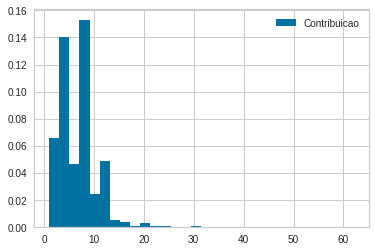

In [60]:
plt.hist(contribuicao['Contribuicao'], bins=30, label='Contribuicao', density=True)
plt.legend();

#### Histórico do Perfil dos Participantes

In [61]:
historicoprfl = pd.read_csv('historico perfil.csv', delimiter= ";", engine='python', decimal=',', encoding='latin-1')

historicoprfl['DtVigencia']= pd.to_datetime(historicoprfl['DtVigencia'],dayfirst= True )

historicoprfl.head()

,ID,DtVigencia,TipoPerfil,Alocacao
0,1,2012-05-16,Renda Fixa,60.0
1,1,2012-05-16,Renda Variavel,40.0
2,1,2012-11-01,Renda Fixa,60.0
3,1,2012-11-01,Renda Variavel,40.0
4,1,2013-11-01,Renda Fixa,60.0


In [62]:
grupoperfil = historicoprfl.groupby(["ID","DtVigencia","TipoPerfil"])
grupoperfil = grupoperfil.sum()
grupoperfil.head()

Alocacao
ID DtVigencia TipoPerfil              
1  2012-05-16 Renda Fixa          60.0
              Renda Variavel      40.0
   2012-11-01 Renda Fixa          60.0
              Renda Variavel      40.0
   2013-11-01 Renda Fixa          60.0

In [63]:
grupoperfil = grupoperfil.reset_index()
grupoperfil.head()

,ID,DtVigencia,TipoPerfil,Alocacao
0,1,2012-05-16,Renda Fixa,60.0
1,1,2012-05-16,Renda Variavel,40.0
2,1,2012-11-01,Renda Fixa,60.0
3,1,2012-11-01,Renda Variavel,40.0
4,1,2013-11-01,Renda Fixa,60.0


###### Tratamento dos Dados

In [64]:
print(grupoperfil.isnull().any())

ID            False
DtVigencia    False
TipoPerfil    False
Alocacao      False
dtype: bool


In [65]:
rendafixa = grupoperfil.loc[grupoperfil['TipoPerfil'] == 'Renda Fixa']
rendafixa = rendafixa.drop(columns=['TipoPerfil'])
rendafixa = rendafixa.rename(columns={"Alocacao":"RendaFixa"}) 
rendavariavel = grupoperfil.loc[grupoperfil['TipoPerfil'] == 'Renda Variavel']
rendavariavel = rendavariavel.drop(columns=['TipoPerfil'])
perfil = pd.merge(rendafixa, rendavariavel, how='left', on=['ID','DtVigencia'])
perfil = perfil.rename(columns={"Alocacao":"RendaVariavel"}) 
perfil.head()

,ID,DtVigencia,RendaFixa,RendaVariavel
0,1,2012-05-16,60.0,40.0
1,1,2012-11-01,60.0,40.0
2,1,2013-11-01,60.0,40.0
3,1,2014-11-01,60.0,40.0
4,1,2015-07-01,60.0,40.0


In [66]:
len(rendafixa)

65340

In [67]:
len(rendavariavel)

40735

In [68]:
len(perfil)

65340

In [69]:
print(perfil.isnull().any())

ID               False
DtVigencia       False
RendaFixa        False
RendaVariavel     True
dtype: bool


In [70]:
perfil['RendaVariavel'] = perfil['RendaVariavel'].fillna(0)
print(perfil.isnull().any())

ID               False
DtVigencia       False
RendaFixa        False
RendaVariavel    False
dtype: bool


In [71]:
sum_alocacao = perfil["RendaFixa"] + perfil["RendaVariavel"]
perfil["AlocacaoTotal"]  = sum_alocacao
perfil.head()

,ID,DtVigencia,RendaFixa,RendaVariavel,AlocacaoTotal
0,1,2012-05-16,60.0,40.0,100.0
1,1,2012-11-01,60.0,40.0,100.0
2,1,2013-11-01,60.0,40.0,100.0
3,1,2014-11-01,60.0,40.0,100.0
4,1,2015-07-01,60.0,40.0,100.0


In [72]:
inconsistencia_perfil = perfil[perfil.AlocacaoTotal != 100]
inconsistencia_perfil

,ID,DtVigencia,RendaFixa,RendaVariavel,AlocacaoTotal


In [73]:
perfil = perfil [['ID', 'DtVigencia', 'RendaFixa', 'RendaVariavel']]
perfil.sort_values(by="DtVigencia")
perfil.head() 

,ID,DtVigencia,RendaFixa,RendaVariavel
0,1,2012-05-16,60.0,40.0
1,1,2012-11-01,60.0,40.0
2,1,2013-11-01,60.0,40.0
3,1,2014-11-01,60.0,40.0
4,1,2015-07-01,60.0,40.0


###### Análise dos Dados

In [74]:
perfil["DiffAlocacao"]  = perfil.RendaFixa.diff()

perfil["DiffID"] = perfil.ID.diff()

perfil["DiffData"] = perfil.DtVigencia.diff()

perfil['DiffAlocacao'] = perfil['DiffAlocacao'].fillna(0)
perfil['DiffID'] = perfil['DiffID'].fillna(0)
perfil["DiffData"] = perfil["DiffData"].fillna(timedelta(days=0))

perfil.head()

,ID,DtVigencia,RendaFixa,RendaVariavel,DiffAlocacao,DiffID,DiffData
0,1,2012-05-16,60.0,40.0,0.0,0.0,0 days
1,1,2012-11-01,60.0,40.0,0.0,0.0,169 days
2,1,2013-11-01,60.0,40.0,0.0,0.0,365 days
3,1,2014-11-01,60.0,40.0,0.0,0.0,365 days
4,1,2015-07-01,60.0,40.0,0.0,0.0,242 days


In [75]:
len(perfil)

65340

In [76]:
ultimoperfil = perfil[perfil.DtVigencia == max(perfil.DtVigencia)]
ultimoperfil.head()

,ID,DtVigencia,RendaFixa,RendaVariavel,DiffAlocacao,DiffID,DiffData
10,1,2020-11-03,60.0,40.0,0.0,0.0,368 days
21,2,2020-11-03,80.0,20.0,0.0,0.0,368 days
32,3,2020-11-03,80.0,20.0,0.0,0.0,368 days
53,4,2020-11-03,95.0,5.0,0.0,0.0,368 days
71,5,2020-11-03,100.0,0.0,0.0,0.0,368 days


###Analisando o perfil dos participantes que têm Renda Variavel

In [77]:
alocRV = ultimoperfil[perfil.RendaVariavel > 0]
alocRV = alocRV.drop(columns=['RendaFixa','DiffAlocacao','DiffData','DiffID'])
alocRV.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,DtVigencia,RendaVariavel
10,1,2020-11-03,40.0
21,2,2020-11-03,20.0
32,3,2020-11-03,20.0
53,4,2020-11-03,5.0
93,6,2020-11-03,10.0


In [78]:
len(alocRV)

3737

####Analisando as características dos participantes que têm Renda Variavel

In [79]:
grupo_alocRV = pd.merge(alocRV, grupo, how='left', on=['ID'])
grupo_alocRV = grupo_alocRV.drop(columns=['RendaVariavel','DtVigencia'])
grupo_alocRV.head()

,ID,DtNascimento,Sexo,Escolaridade,FaixaSalarial,DtIncricaoPlano
0,1,1976-01-30,M,Superior Completo,L2,2012-05-16
1,2,1978-10-30,M,Superior Completo,L1,2012-02-03
2,3,1975-11-13,F,Superior Completo,L1,2011-04-12
3,4,1955-06-02,M,Superior Completo,L1,1984-06-25
4,6,1956-04-03,M,Superior Completo,L1,1976-05-24


In [80]:
grupo_alocRV.DtNascimento.describe(datetime_is_numeric=True)

count                             3737
mean     1977-06-30 08:32:06.679153792
min                1948-12-29 00:00:00
25%                1971-07-06 00:00:00
50%                1978-10-30 00:00:00
75%                1984-03-05 00:00:00
max                2001-02-02 00:00:00
Name: DtNascimento, dtype: object

In [81]:
grupo_alocRV.DtIncricaoPlano.describe(datetime_is_numeric=True)

count                             3737
mean     2010-06-28 15:08:14.193206016
min                1975-08-01 00:00:00
25%                2005-11-22 00:00:00
50%                2014-01-24 00:00:00
75%                2018-11-06 00:00:00
max                2020-09-30 00:00:00
Name: DtIncricaoPlano, dtype: object

In [82]:
grupo_alocRV['Escolaridade'].value_counts(normalize=True)

Superior Completo      0.628579
2o. Grau Completo      0.222638
Pos-Graduacao          0.096334
Superior Incompleto    0.037463
Mestrado               0.006957
2o. Grau Incompleto    0.006690
1o. Grau Completo      0.001338
Name: Escolaridade, dtype: float64

In [83]:
grupo['Escolaridade'].value_counts(normalize=True)

Superior Completo      0.635341
2o. Grau Completo      0.217075
Pos-Graduacao          0.095963
Superior Incompleto    0.036400
Mestrado               0.007280
2o. Grau Incompleto    0.006618
1o. Grau Completo      0.001324
Name: Escolaridade, dtype: float64

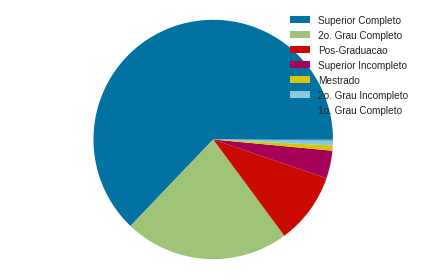

In [84]:
plt.pie(grupo_alocRV.Escolaridade.value_counts());
plt.legend(labels=grupo_alocRV['Escolaridade'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [85]:
grupo_alocRV['Sexo'].value_counts(normalize=True)

M    0.759433
F    0.240567
Name: Sexo, dtype: float64

In [86]:
grupo['Sexo'].value_counts(normalize=True)

M    0.731635
F    0.268365
Name: Sexo, dtype: float64

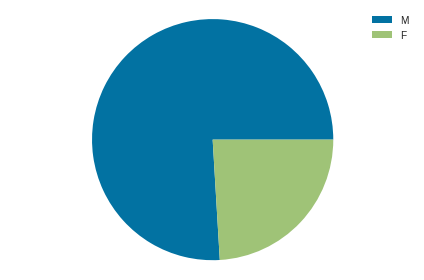

In [87]:
plt.pie(grupo_alocRV.Sexo.value_counts());
plt.legend(labels=grupo_alocRV['Sexo'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [88]:
grupo_alocRV['FaixaSalarial'].value_counts(normalize=True)

L2    0.697083
L3    0.220498
L1    0.082419
Name: FaixaSalarial, dtype: float64

In [89]:
grupo['FaixaSalarial'].value_counts(normalize=True)

L2    0.704831
L3    0.212111
L1    0.083058
Name: FaixaSalarial, dtype: float64

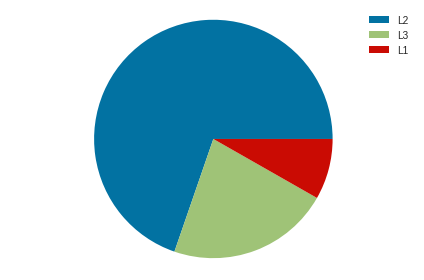

In [90]:
plt.pie(grupo_alocRV.FaixaSalarial.value_counts());
plt.legend(labels=grupo_alocRV['FaixaSalarial'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

####Analisando as características dos dependentes dos participantes que têm Renda Variavel

In [91]:
dependentes_alocRV = pd.merge(alocRV, dependentes, how='left', on=['ID'])
dependentes_alocRV = dependentes_alocRV.drop(columns=['RendaVariavel','DtVigencia'])
dependentes_alocRV.head()

,ID,Parentesco,DtNascimento
0,1,Pai ou Mae,1945-07-26
1,1,Companheiro(a),1980-08-28
2,2,Conjuge,1975-07-03
3,2,Filho(a),2009-07-03
4,3,NaN,NaT


In [92]:
dependentes_alocRV_clean=dependentes_alocRV.dropna()
print(dependentes_alocRV_clean.isnull().any())

ID              False
Parentesco      False
DtNascimento    False
dtype: bool


In [93]:
dependentes_alocRV = dependentes_alocRV_clean
dependentes_alocRV.DtNascimento.describe(datetime_is_numeric=True)

count                             9687
mean     1979-06-21 18:21:39.969031104
min                1900-01-01 00:00:00
25%                1961-04-05 00:00:00
50%                1980-09-29 00:00:00
75%                1998-04-01 12:00:00
max                2020-11-01 00:00:00
Name: DtNascimento, dtype: object

In [94]:
dependentes_alocRV['Parentesco'].value_counts(normalize=True)

Filho(a)             0.327139
Pai ou Mae           0.265614
Conjuge              0.231135
Irmao ou Irma        0.105296
Designado            0.036750
Companheiro(a)       0.026530
Enteado(a)           0.004129
Ex-Conjuge           0.001548
Sogro(a)             0.001032
Ex-Companheiro(a)    0.000516
Menor sob Guarda     0.000310
Name: Parentesco, dtype: float64

In [95]:
dependentes['Parentesco'].value_counts(normalize=True)

Filho(a)             0.327802
Pai ou Mae           0.261811
Conjuge              0.229639
Irmao ou Irma        0.106143
Designado            0.039139
Companheiro(a)       0.027739
Enteado(a)           0.004053
Ex-Conjuge           0.001520
Sogro(a)             0.001330
Menor sob Guarda     0.000443
Ex-Companheiro(a)    0.000380
Name: Parentesco, dtype: float64

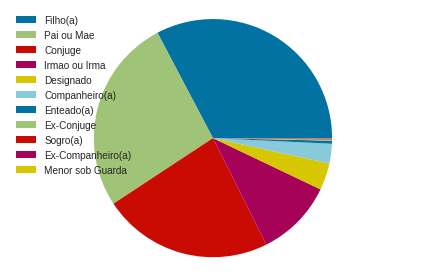

In [96]:
plt.pie(dependentes_alocRV.Parentesco.value_counts());
plt.legend(labels=dependentes_alocRV['Parentesco'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

####Analisando as características das Contribuições dos participantes que têm Renda Variavel

In [97]:
IDcontribuicao = contribuicao.groupby(["ID"])
ultimacontribuicao = IDcontribuicao['DtVigencia'].max()
ultimacontribuicao = ultimacontribuicao.reset_index()
ultimacontribuicao.head(10)

,ID,DtVigencia
0,1,2012-05-16
1,2,2012-02-03
2,3,2011-04-12
3,4,2012-05-21
4,5,2006-03-07
5,6,2010-01-01
6,7,1999-01-01
7,8,2015-05-01
8,9,2012-01-01
9,10,1999-01-01


In [98]:
contribuicao_ult = pd.merge(ultimacontribuicao, contribuicao, how='left', on=['ID','DtVigencia'])

In [99]:
print(contribuicao_ult.isnull().any())

ID              False
DtVigencia      False
Contribuicao    False
dtype: bool


In [100]:
print(alocRV.isnull().any())

ID               False
DtVigencia       False
RendaVariavel    False
dtype: bool


In [101]:
contribuicao_alocRV = pd.merge(alocRV, contribuicao_ult, how='inner', on=['ID'])
contribuicao_alocRV = contribuicao_alocRV.drop(columns=['RendaVariavel','DtVigencia_y'])
contribuicao_alocRV = contribuicao_alocRV.rename(columns={"DtVigencia_x": "DtVigencia"})
contribuicao_alocRV.head()

,ID,DtVigencia,Contribuicao
0,1,2020-11-03,4.0
1,2,2020-11-03,8.0
2,3,2020-11-03,5.0
3,4,2020-11-03,62.0
4,6,2020-11-03,15.0


In [102]:
print(contribuicao_alocRV.isnull().any())

ID              False
DtVigencia      False
Contribuicao    False
dtype: bool


In [103]:
contribuicao_alocRV.Contribuicao.describe()

count    3720.000000
mean        6.734140
std         3.314235
min         1.000000
25%         4.000000
50%         7.000000
75%         8.000000
max        62.000000
Name: Contribuicao, dtype: float64

In [104]:
contribuicao_alocRV.Contribuicao.mode()

0    8.0
dtype: float64

In [105]:
contribuicao.Contribuicao.describe()

count    11415.000000
mean         6.899956
std          3.568717
min          1.000000
25%          4.000000
50%          7.000000
75%          8.000000
max         62.000000
Name: Contribuicao, dtype: float64

In [106]:
contribuicao.Contribuicao.mode()

0    8.0
dtype: float64

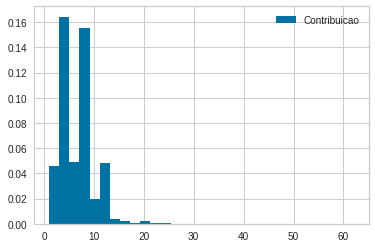

In [107]:
plt.hist(contribuicao_alocRV['Contribuicao'], bins=30, label='Contribuicao', density=True)
plt.legend();

###Analisando o perfil dos 25% dos participantes que mais têm Renda Variável

In [108]:
ultimoperfil.RendaVariavel.describe()

count    6042.000000
mean       18.587223
std        21.075119
min         0.000000
25%         0.000000
50%        10.000000
75%        30.000000
max        60.000000
Name: RendaVariavel, dtype: float64

In [109]:
maioresRV = ultimoperfil[ultimoperfil.RendaVariavel >= 30]
maioresRV = maioresRV.drop(columns=['RendaFixa','DiffAlocacao','DiffData','DiffID'])
maioresRV.head()

,ID,DtVigencia,RendaVariavel
10,1,2020-11-03,40.0
784,41,2020-11-03,50.0
927,54,2020-11-03,60.0
1552,88,2020-11-03,30.0
1598,92,2020-11-03,50.0


####Analisando as características dos participantes que mais têm Renda Variável

In [110]:
grupo_maioresRV = pd.merge(maioresRV, grupo, how='left', on=['ID'])
grupo_maioresRV.head()

,ID,DtVigencia,RendaVariavel,DtNascimento,Sexo,Escolaridade,FaixaSalarial,DtIncricaoPlano
0,1,2020-11-03,40.0,1976-01-30,M,Superior Completo,L2,2012-05-16
1,41,2020-11-03,50.0,1980-09-15,F,2o. Grau Completo,L1,2017-04-18
2,54,2020-11-03,60.0,1980-03-05,F,Superior Completo,L1,2019-03-14
3,88,2020-11-03,30.0,1976-11-23,M,2o. Grau Completo,L2,2019-05-31
4,92,2020-11-03,50.0,1985-12-06,M,Superior Completo,L2,2019-01-02


In [111]:
grupo_maioresRV.DtNascimento.describe(datetime_is_numeric=True)

count                             1774
mean     1981-10-06 09:58:14.475761024
min                1970-11-07 00:00:00
25%                1977-08-04 06:00:00
50%                1981-06-15 12:00:00
75%                1986-01-05 06:00:00
max                2001-02-02 00:00:00
Name: DtNascimento, dtype: object

In [112]:
grupo_maioresRV.DtIncricaoPlano.describe(datetime_is_numeric=True)

count                             1774
mean     2014-07-23 18:22:19.346110208
min                1993-11-24 00:00:00
25%                2011-03-30 06:00:00
50%                2016-11-24 00:00:00
75%                2019-03-27 18:00:00
max                2020-09-30 00:00:00
Name: DtIncricaoPlano, dtype: object

In [113]:
grupo_maioresRV['Escolaridade'].value_counts(normalize=True)

Superior Completo      0.605411
2o. Grau Completo      0.250282
Pos-Graduacao          0.080045
Superior Incompleto    0.049042
2o. Grau Incompleto    0.008455
Mestrado               0.006201
1o. Grau Completo      0.000564
Name: Escolaridade, dtype: float64

In [114]:
grupo['Escolaridade'].value_counts(normalize=True)

Superior Completo      0.635341
2o. Grau Completo      0.217075
Pos-Graduacao          0.095963
Superior Incompleto    0.036400
Mestrado               0.007280
2o. Grau Incompleto    0.006618
1o. Grau Completo      0.001324
Name: Escolaridade, dtype: float64

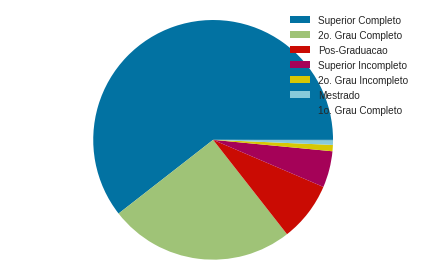

In [115]:
plt.pie(grupo_maioresRV.Escolaridade.value_counts());
plt.legend(labels=grupo_maioresRV['Escolaridade'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [116]:
grupo_maioresRV['Sexo'].value_counts(normalize=True)

M    0.782413
F    0.217587
Name: Sexo, dtype: float64

In [117]:
grupo['Sexo'].value_counts(normalize=True)

M    0.731635
F    0.268365
Name: Sexo, dtype: float64

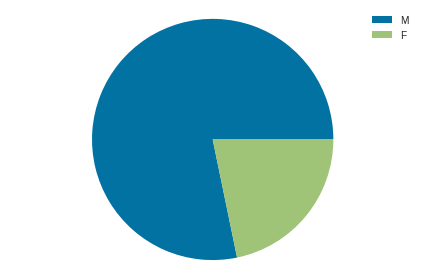

In [118]:
plt.pie(grupo_maioresRV.Sexo.value_counts());
plt.legend(labels=grupo_maioresRV['Sexo'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [119]:
grupo_maioresRV['FaixaSalarial'].value_counts(normalize=True)

L2    0.749718
L3    0.153326
L1    0.096956
Name: FaixaSalarial, dtype: float64

In [120]:
grupo['FaixaSalarial'].value_counts(normalize=True)

L2    0.704831
L3    0.212111
L1    0.083058
Name: FaixaSalarial, dtype: float64

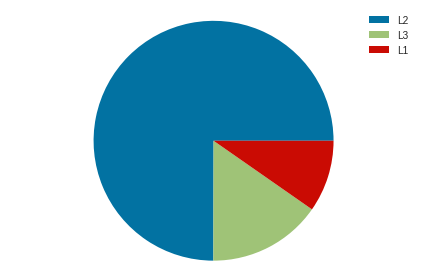

In [121]:
plt.pie(grupo_maioresRV.FaixaSalarial.value_counts());
plt.legend(labels=grupo_maioresRV['FaixaSalarial'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

####Analisando as características dos dependentes destes participantes

In [122]:
dependentes_maioresRV = pd.merge(maioresRV, dependentes, how='left', on=['ID'])
dependentes_maioresRV = dependentes_maioresRV.drop(columns=['RendaVariavel','DtVigencia'])
dependentes_maioresRV.head()

,ID,Parentesco,DtNascimento
0,1,Pai ou Mae,1945-07-26
1,1,Companheiro(a),1980-08-28
2,41,Conjuge,1974-12-11
3,41,Filho(a),2007-06-04
4,54,Filho(a),2002-10-17


In [123]:
dependentes_maioresRV_clean=dependentes_maioresRV.dropna()
print(dependentes_maioresRV_clean.isnull().any())

ID              False
Parentesco      False
DtNascimento    False
dtype: bool


In [124]:
dependentes_maioresRV = dependentes_maioresRV_clean
dependentes_maioresRV.DtNascimento.describe(datetime_is_numeric=True)

count                             4290
mean     1981-08-14 19:45:54.125874752
min                1900-01-01 00:00:00
25%                1961-02-25 06:00:00
50%                1981-10-23 00:00:00
75%                2002-10-01 12:00:00
max                2020-11-01 00:00:00
Name: DtNascimento, dtype: object

In [125]:
dependentes_maioresRV['Parentesco'].value_counts(normalize=True)

Pai ou Mae           0.302098
Filho(a)             0.282984
Conjuge              0.236364
Irmao ou Irma        0.114219
Designado            0.036131
Companheiro(a)       0.019580
Enteado(a)           0.004196
Ex-Conjuge           0.001865
Sogro(a)             0.001399
Menor sob Guarda     0.000699
Ex-Companheiro(a)    0.000466
Name: Parentesco, dtype: float64

In [126]:
dependentes['Parentesco'].value_counts(normalize=True)

Filho(a)             0.327802
Pai ou Mae           0.261811
Conjuge              0.229639
Irmao ou Irma        0.106143
Designado            0.039139
Companheiro(a)       0.027739
Enteado(a)           0.004053
Ex-Conjuge           0.001520
Sogro(a)             0.001330
Menor sob Guarda     0.000443
Ex-Companheiro(a)    0.000380
Name: Parentesco, dtype: float64

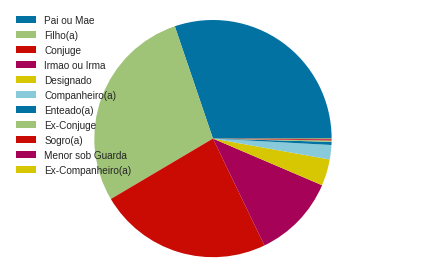

In [127]:
plt.pie(dependentes_maioresRV.Parentesco.value_counts());
plt.legend(labels=dependentes_maioresRV['Parentesco'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

####Analisando as contribuições destes participantes

In [128]:
contribuicao_maioresRV = pd.merge(maioresRV, contribuicao_ult, how='inner', on=['ID'])
contribuicao_maioresRV = contribuicao_maioresRV.drop(columns=['RendaVariavel','DtVigencia_y'])
contribuicao_maioresRV = contribuicao_maioresRV.rename(columns={"DtVigencia_x": "DtVigencia"})
contribuicao_maioresRV.head()

,ID,DtVigencia,Contribuicao
0,1,2020-11-03,4.0
1,41,2020-11-03,4.0
2,54,2020-11-03,4.0
3,88,2020-11-03,4.0
4,92,2020-11-03,4.0


In [129]:
contribuicao_maioresRV.Contribuicao.describe()

count    1769.000000
mean        5.984737
std         2.776211
min         1.000000
25%         4.000000
50%         5.000000
75%         8.000000
max        20.000000
Name: Contribuicao, dtype: float64

In [130]:
contribuicao_maioresRV.Contribuicao.mode()

0    4.0
dtype: float64

In [131]:
contribuicao.Contribuicao.describe()

count    11415.000000
mean         6.899956
std          3.568717
min          1.000000
25%          4.000000
50%          7.000000
75%          8.000000
max         62.000000
Name: Contribuicao, dtype: float64

In [132]:
contribuicao.Contribuicao.mode()

0    8.0
dtype: float64

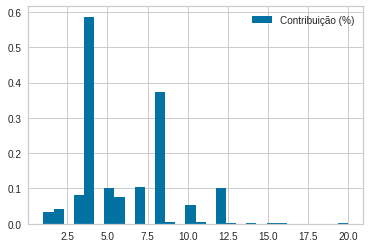

In [133]:
plt.hist(contribuicao_maioresRV['Contribuicao'], bins=30, label='Contribuição (%)', density=True)
plt.legend();

###Analisando o perfil dos participantes que têm Renda Fixa (todos)

In [134]:
alocRF = ultimoperfil[ultimoperfil.RendaFixa > 0]
alocRF = alocRF.drop(columns=['RendaVariavel','DiffAlocacao','DiffData','DiffID'])
alocRF.head()

,ID,DtVigencia,RendaFixa
10,1,2020-11-03,60.0
21,2,2020-11-03,80.0
32,3,2020-11-03,80.0
53,4,2020-11-03,95.0
71,5,2020-11-03,100.0


####Analisando as características dos participantes que têm Renda Fixa

In [135]:
grupo_alocRF = pd.merge(alocRF, grupo, how='left', on=['ID'])
grupo_alocRF.head()

,ID,DtVigencia,RendaFixa,DtNascimento,Sexo,Escolaridade,FaixaSalarial,DtIncricaoPlano
0,1,2020-11-03,60.0,1976-01-30,M,Superior Completo,L2,2012-05-16
1,2,2020-11-03,80.0,1978-10-30,M,Superior Completo,L1,2012-02-03
2,3,2020-11-03,80.0,1975-11-13,F,Superior Completo,L1,2011-04-12
3,4,2020-11-03,95.0,1955-06-02,M,Superior Completo,L1,1984-06-25
4,5,2020-11-03,100.0,1971-03-17,F,Superior Completo,L1,2006-03-07


In [136]:
len(grupo)

6044

In [137]:
len(grupo_alocRF)

6042

####Analisando as características dos dependentes dos participantes que têm Renda Fixa

In [138]:
dependentes_alocRF = pd.merge(alocRF, dependentes, how='left', on=['ID'])
dependentes_alocRF = dependentes_alocRF.drop(columns=['RendaFixa','DtVigencia'])
dependentes_alocRF.head()

,ID,Parentesco,DtNascimento
0,1,Pai ou Mae,1945-07-26
1,1,Companheiro(a),1980-08-28
2,2,Conjuge,1975-07-03
3,2,Filho(a),2009-07-03
4,3,NaN,NaT


In [139]:
dependentes_alocRF_clean=dependentes_alocRF.dropna()
print(dependentes_alocRF_clean.isnull().any())

ID              False
Parentesco      False
DtNascimento    False
dtype: bool


In [140]:
dependentes_alocRF = dependentes_alocRF_clean
dependentes_alocRF.DtNascimento.describe(datetime_is_numeric=True)

count                            15784
mean     1979-02-19 05:31:48.565636288
min                1900-01-01 00:00:00
25%                1960-11-27 12:00:00
50%                1980-07-01 00:00:00
75%                1997-10-16 00:00:00
max                2020-11-01 00:00:00
Name: DtNascimento, dtype: object

In [141]:
dependentes_alocRF['Parentesco'].value_counts(normalize=True)

Filho(a)             0.327674
Pai ou Mae           0.261911
Conjuge              0.229600
Irmao ou Irma        0.106183
Designado            0.039154
Companheiro(a)       0.027750
Enteado(a)           0.004055
Ex-Conjuge           0.001521
Sogro(a)             0.001330
Menor sob Guarda     0.000443
Ex-Companheiro(a)    0.000380
Name: Parentesco, dtype: float64

In [142]:
dependentes['Parentesco'].value_counts(normalize=True)

Filho(a)             0.327802
Pai ou Mae           0.261811
Conjuge              0.229639
Irmao ou Irma        0.106143
Designado            0.039139
Companheiro(a)       0.027739
Enteado(a)           0.004053
Ex-Conjuge           0.001520
Sogro(a)             0.001330
Menor sob Guarda     0.000443
Ex-Companheiro(a)    0.000380
Name: Parentesco, dtype: float64

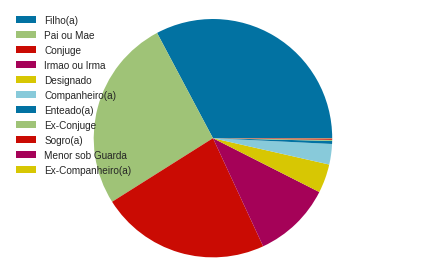

In [143]:
plt.pie(dependentes_alocRF.Parentesco.value_counts());
plt.legend(labels=dependentes_alocRF['Parentesco'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

####Analisando as contribuições destes participantes

In [144]:
contribuicao_alocRF = pd.merge(alocRF, contribuicao_ult, how='inner', on=['ID'])
contribuicao_alocRF = contribuicao_alocRF.drop(columns=['RendaFixa','DtVigencia_y'])
contribuicao_alocRF = contribuicao_alocRF.rename(columns={"DtVigencia_x": "DtVigencia"})
contribuicao_alocRF.head()

,ID,DtVigencia,Contribuicao
0,1,2020-11-03,4.0
1,2,2020-11-03,8.0
2,3,2020-11-03,5.0
3,4,2020-11-03,62.0
4,5,2020-11-03,8.0


In [145]:
contribuicao_alocRF.Contribuicao.describe()

count    6021.000000
mean        6.731108
std         3.291327
min         1.000000
25%         4.000000
50%         7.000000
75%         8.000000
max        62.000000
Name: Contribuicao, dtype: float64

In [146]:
contribuicao_alocRF.Contribuicao.mode()

0    8.0
dtype: float64

In [147]:
contribuicao.Contribuicao.describe()

count    11415.000000
mean         6.899956
std          3.568717
min          1.000000
25%          4.000000
50%          7.000000
75%          8.000000
max         62.000000
Name: Contribuicao, dtype: float64

In [148]:
contribuicao.Contribuicao.mode()

0    8.0
dtype: float64

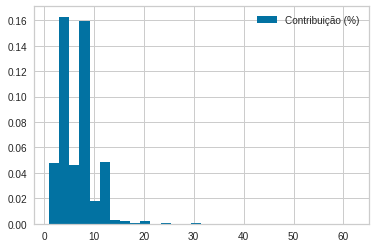

In [149]:
plt.hist(contribuicao_alocRF['Contribuicao'], bins=30, label='Contribuição (%)', density=True)
plt.legend();

###Analisando o perfil dos participantes que têm pelo menos 70% em Renda Fixa

In [150]:
antimaioresRV_RF = ultimoperfil[ultimoperfil.RendaFixa >= 70]
antimaioresRV_RF = antimaioresRV_RF.drop(columns=['RendaVariavel','DiffAlocacao','DiffData','DiffID'])
antimaioresRV_RF.head()

,ID,DtVigencia,RendaFixa
21,2,2020-11-03,80.0
32,3,2020-11-03,80.0
53,4,2020-11-03,95.0
71,5,2020-11-03,100.0
93,6,2020-11-03,90.0


####Analisando as características dos participantes que têm pelo menos 70% em Renda Fixa

In [151]:
grupo_antimaioresRV_RF = pd.merge(antimaioresRV_RF, grupo, how='left', on=['ID'])
grupo_antimaioresRV_RF.head()

,ID,DtVigencia,RendaFixa,DtNascimento,Sexo,Escolaridade,FaixaSalarial,DtIncricaoPlano
0,2,2020-11-03,80.0,1978-10-30,M,Superior Completo,L1,2012-02-03
1,3,2020-11-03,80.0,1975-11-13,F,Superior Completo,L1,2011-04-12
2,4,2020-11-03,95.0,1955-06-02,M,Superior Completo,L1,1984-06-25
3,5,2020-11-03,100.0,1971-03-17,F,Superior Completo,L1,2006-03-07
4,6,2020-11-03,90.0,1956-04-03,M,Superior Completo,L1,1976-05-24


In [152]:
grupo_antimaioresRV_RF.DtNascimento.describe(datetime_is_numeric=True)

count                             4669
mean     1975-06-07 03:09:22.090383232
min                1948-05-13 00:00:00
25%                1967-11-20 00:00:00
50%                1976-09-06 00:00:00
75%                1982-09-20 00:00:00
max                1998-07-07 00:00:00
Name: DtNascimento, dtype: object

In [153]:
grupo_antimaioresRV_RF.DtIncricaoPlano.describe(datetime_is_numeric=True)

count                             4669
mean     2008-08-04 20:47:32.859280128
min                1975-08-01 00:00:00
25%                2003-02-20 00:00:00
50%                2012-03-09 00:00:00
75%                2017-07-24 00:00:00
max                2020-09-29 00:00:00
Name: DtIncricaoPlano, dtype: object

In [154]:
grupo_antimaioresRV_RF['Escolaridade'].value_counts(normalize=True)

Superior Completo      0.645320
2o. Grau Completo      0.204326
Pos-Graduacao          0.102592
Superior Incompleto    0.032769
Mestrado               0.007496
2o. Grau Incompleto    0.005997
1o. Grau Completo      0.001499
Name: Escolaridade, dtype: float64

In [155]:
grupo['Escolaridade'].value_counts(normalize=True)

Superior Completo      0.635341
2o. Grau Completo      0.217075
Pos-Graduacao          0.095963
Superior Incompleto    0.036400
Mestrado               0.007280
2o. Grau Incompleto    0.006618
1o. Grau Completo      0.001324
Name: Escolaridade, dtype: float64

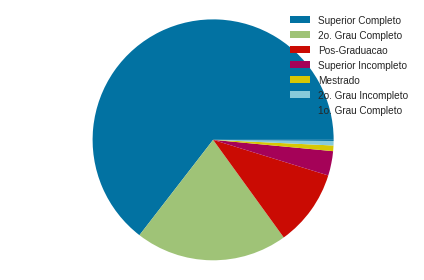

In [156]:
plt.pie(grupo_antimaioresRV_RF.Escolaridade.value_counts());
plt.legend(labels=grupo_antimaioresRV_RF['Escolaridade'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [157]:
grupo_antimaioresRV_RF['Sexo'].value_counts(normalize=True)

M    0.713001
F    0.286999
Name: Sexo, dtype: float64

In [158]:
grupo['Sexo'].value_counts(normalize=True)

M    0.731635
F    0.268365
Name: Sexo, dtype: float64

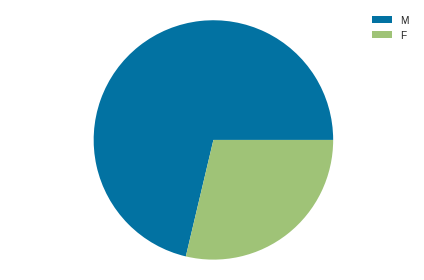

In [159]:
plt.pie(grupo_antimaioresRV_RF.Sexo.value_counts());
plt.legend(labels=grupo_antimaioresRV_RF['Sexo'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [160]:
grupo_antimaioresRV_RF['FaixaSalarial'].value_counts(normalize=True)

L2    0.687942
L3    0.234740
L1    0.077318
Name: FaixaSalarial, dtype: float64

In [161]:
grupo['FaixaSalarial'].value_counts(normalize=True)

L2    0.704831
L3    0.212111
L1    0.083058
Name: FaixaSalarial, dtype: float64

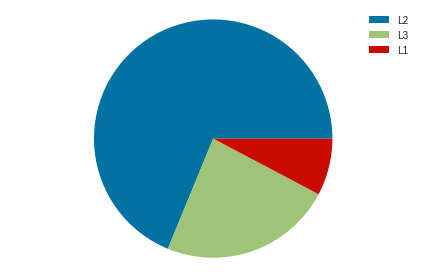

In [162]:
plt.pie(grupo_antimaioresRV_RF.FaixaSalarial.value_counts());
plt.legend(labels=grupo_antimaioresRV_RF['FaixaSalarial'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

####Analisando as características dos dependentes destes participantes que têm pelo menos 70% em Renda Fixa

In [163]:
dependentes_antimaioresRV_RF = pd.merge(antimaioresRV_RF, dependentes, how='left', on=['ID'])
dependentes_antimaioresRV_RF = dependentes_antimaioresRV_RF.drop(columns=['RendaFixa','DtVigencia'])
dependentes_antimaioresRV_RF.head()

,ID,Parentesco,DtNascimento
0,2,Conjuge,1975-07-03
1,2,Filho(a),2009-07-03
2,3,NaN,NaT
3,4,Pai ou Mae,1927-11-07
4,4,Pai ou Mae,1929-05-04


In [164]:
dependentes_antimaioresRV_RF_clean=dependentes_antimaioresRV_RF.dropna()
print(dependentes_antimaioresRV_RF_clean.isnull().any())

ID              False
Parentesco      False
DtNascimento    False
dtype: bool


In [165]:
dependentes_antimaioresRV_RF = dependentes_antimaioresRV_RF_clean
dependentes_antimaioresRV_RF.DtNascimento.describe(datetime_is_numeric=True)

count                            12530
mean     1978-06-02 11:15:10.774141920
min                1900-01-01 00:00:00
25%                1960-11-08 06:00:00
50%                1980-01-28 00:00:00
75%                1996-10-27 18:00:00
max                2020-08-19 00:00:00
Name: DtNascimento, dtype: object

In [166]:
dependentes_antimaioresRV_RF['Parentesco'].value_counts(normalize=True)

Filho(a)             0.341421
Pai ou Mae           0.249481
Conjuge              0.227614
Irmao ou Irma        0.104150
Designado            0.039665
Companheiro(a)       0.030407
Enteado(a)           0.003990
Ex-Conjuge           0.001277
Sogro(a)             0.001277
Ex-Companheiro(a)    0.000399
Menor sob Guarda     0.000319
Name: Parentesco, dtype: float64

In [167]:
dependentes['Parentesco'].value_counts(normalize=True)

Filho(a)             0.327802
Pai ou Mae           0.261811
Conjuge              0.229639
Irmao ou Irma        0.106143
Designado            0.039139
Companheiro(a)       0.027739
Enteado(a)           0.004053
Ex-Conjuge           0.001520
Sogro(a)             0.001330
Menor sob Guarda     0.000443
Ex-Companheiro(a)    0.000380
Name: Parentesco, dtype: float64

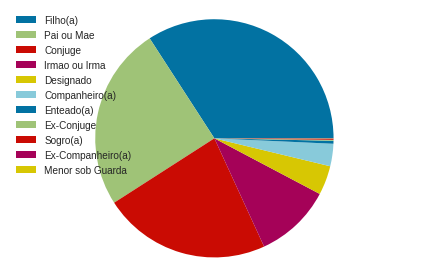

In [168]:
plt.pie(dependentes_antimaioresRV_RF.Parentesco.value_counts());
plt.legend(labels=dependentes_antimaioresRV_RF['Parentesco'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

####Analisando as contribuições destes participantes que têm pelo menos 70% em Renda Fixa

In [169]:
contribuicao_antimaioresRV_RF = pd.merge(antimaioresRV_RF, contribuicao_ult, how='inner', on=['ID'])
contribuicao_antimaioresRV_RF = contribuicao_antimaioresRV_RF.drop(columns=['RendaFixa','DtVigencia_y'])
contribuicao_antimaioresRV_RF = contribuicao_antimaioresRV_RF.rename(columns={"DtVigencia_x": "DtVigencia"})
contribuicao_antimaioresRV_RF.head()

,ID,DtVigencia,Contribuicao
0,2,2020-11-03,8.0
1,3,2020-11-03,5.0
2,4,2020-11-03,62.0
3,5,2020-11-03,8.0
4,6,2020-11-03,15.0


In [170]:
contribuicao_antimaioresRV_RF.Contribuicao.describe()

count    4653.000000
mean        6.983881
std         3.404191
min         1.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        62.000000
Name: Contribuicao, dtype: float64

In [171]:
contribuicao_antimaioresRV_RF.Contribuicao.mode()

0    8.0
dtype: float64

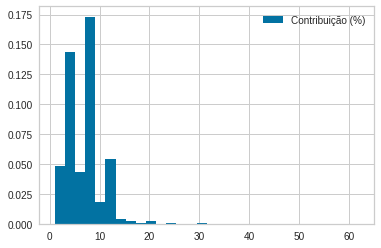

In [172]:
plt.hist(contribuicao_antimaioresRV_RF['Contribuicao'], bins=30, label='Contribuição (%)', density=True)
plt.legend();

###Analisando o perfil dos 25% dos participantes que mais têm Renda Fixa

In [173]:
ultimoperfil.RendaFixa.describe()

count    6042.000000
mean       81.412777
std        21.075119
min        40.000000
25%        70.000000
50%        90.000000
75%       100.000000
max       100.000000
Name: RendaFixa, dtype: float64

In [174]:
maioresRF = ultimoperfil[ultimoperfil.RendaFixa == 100]
maioresRF = maioresRF.drop(columns=['RendaVariavel','DiffAlocacao','DiffData','DiffID'])
maioresRF.head()

,ID,DtVigencia,RendaFixa
71,5,2020-11-03,100.0
136,8,2020-11-03,100.0
157,9,2020-11-03,100.0
177,10,2020-11-03,100.0
210,12,2020-11-03,100.0


####Analisando as características dos participantes que mais têm Renda Fixa

In [175]:
grupo_maioresRF = pd.merge(maioresRF, grupo, how='left', on=['ID'])
grupo_maioresRF.head()

,ID,DtVigencia,RendaFixa,DtNascimento,Sexo,Escolaridade,FaixaSalarial,DtIncricaoPlano
0,5,2020-11-03,100.0,1971-03-17,F,Superior Completo,L1,2006-03-07
1,8,2020-11-03,100.0,1960-08-21,M,Superior Completo,L1,1993-11-24
2,9,2020-11-03,100.0,1958-10-30,F,2o. Grau Completo,L1,1993-11-25
3,10,2020-11-03,100.0,1955-11-25,F,Superior Completo,L1,1984-07-03
4,12,2020-11-03,100.0,1957-02-03,F,Superior Completo,L2,1978-01-09


In [176]:
grupo_maioresRF.DtNascimento.describe(datetime_is_numeric=True)

count                             2305
mean     1976-04-04 01:43:04.815618208
min                1948-05-13 00:00:00
25%                1969-04-27 00:00:00
50%                1978-01-29 00:00:00
75%                1983-05-27 00:00:00
max                1997-10-16 00:00:00
Name: DtNascimento, dtype: object

In [177]:
grupo_maioresRF.DtIncricaoPlano.describe(datetime_is_numeric=True)

count                             2305
mean     2009-05-15 20:23:13.145336832
min                1975-08-20 00:00:00
25%                2005-06-15 00:00:00
50%                2014-01-10 00:00:00
75%                2017-07-24 00:00:00
max                2020-09-25 00:00:00
Name: DtIncricaoPlano, dtype: object

In [178]:
grupo_maioresRF['Escolaridade'].value_counts(normalize=True)

Superior Completo      0.646855
2o. Grau Completo      0.207375
Pos-Graduacao          0.095445
Superior Incompleto    0.034707
Mestrado               0.007809
2o. Grau Incompleto    0.006508
1o. Grau Completo      0.001302
Name: Escolaridade, dtype: float64

In [179]:
grupo['Escolaridade'].value_counts(normalize=True)

Superior Completo      0.635341
2o. Grau Completo      0.217075
Pos-Graduacao          0.095963
Superior Incompleto    0.036400
Mestrado               0.007280
2o. Grau Incompleto    0.006618
1o. Grau Completo      0.001324
Name: Escolaridade, dtype: float64

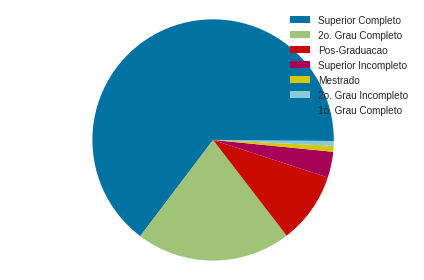

In [180]:
plt.pie(grupo_maioresRF.Escolaridade.value_counts());
plt.legend(labels=grupo_maioresRF['Escolaridade'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [181]:
grupo_maioresRF['Sexo'].value_counts(normalize=True)

M    0.686334
F    0.313666
Name: Sexo, dtype: float64

In [182]:
grupo['Sexo'].value_counts(normalize=True)

M    0.731635
F    0.268365
Name: Sexo, dtype: float64

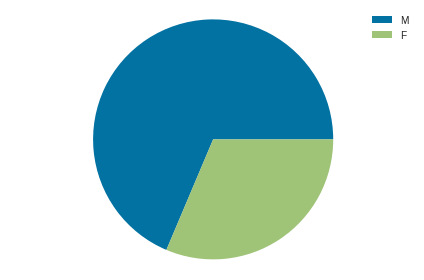

In [183]:
plt.pie(grupo_maioresRF.Sexo.value_counts());
plt.legend(labels=grupo_maioresRF['Sexo'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [184]:
grupo_maioresRF['FaixaSalarial'].value_counts(normalize=True)

L2    0.717570
L3    0.198698
L1    0.083731
Name: FaixaSalarial, dtype: float64

In [185]:
grupo['FaixaSalarial'].value_counts(normalize=True)

L2    0.704831
L3    0.212111
L1    0.083058
Name: FaixaSalarial, dtype: float64

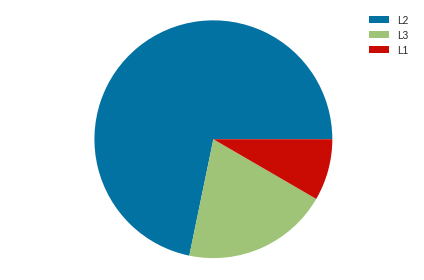

In [186]:
plt.pie(grupo_maioresRF.FaixaSalarial.value_counts());
plt.legend(labels=grupo_maioresRF['FaixaSalarial'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

####Analisando as características dos dependentes destes participantes que têm 100% em Renda Fixa

In [187]:
dependentes_maioresRF = pd.merge(maioresRF, dependentes, how='left', on=['ID'])
dependentes_maioresRF = dependentes_maioresRF.drop(columns=['RendaFixa','DtVigencia'])
dependentes_maioresRF.head()

,ID,Parentesco,DtNascimento
0,5,Conjuge,1971-04-17
1,5,Filho(a),1998-02-20
2,5,Filho(a),2002-01-14
3,8,Conjuge,1948-10-10
4,8,Enteado(a),1975-10-02


In [188]:
dependentes_maioresRF.DtNascimento.describe(datetime_is_numeric=True)

count                             6097
mean     1978-08-08 13:05:46.596687296
min                1900-01-12 00:00:00
25%                1960-08-18 00:00:00
50%                1980-02-17 00:00:00
75%                1997-02-01 00:00:00
max                2020-08-19 00:00:00
Name: DtNascimento, dtype: object

In [189]:
dependentes_maioresRF['Parentesco'].value_counts(normalize=True)

Filho(a)             0.328522
Pai ou Mae           0.256028
Conjuge              0.227161
Irmao ou Irma        0.107594
Designado            0.042972
Companheiro(a)       0.029687
Enteado(a)           0.003936
Sogro(a)             0.001804
Ex-Conjuge           0.001476
Menor sob Guarda     0.000656
Ex-Companheiro(a)    0.000164
Name: Parentesco, dtype: float64

In [190]:
dependentes['Parentesco'].value_counts(normalize=True)

Filho(a)             0.327802
Pai ou Mae           0.261811
Conjuge              0.229639
Irmao ou Irma        0.106143
Designado            0.039139
Companheiro(a)       0.027739
Enteado(a)           0.004053
Ex-Conjuge           0.001520
Sogro(a)             0.001330
Menor sob Guarda     0.000443
Ex-Companheiro(a)    0.000380
Name: Parentesco, dtype: float64

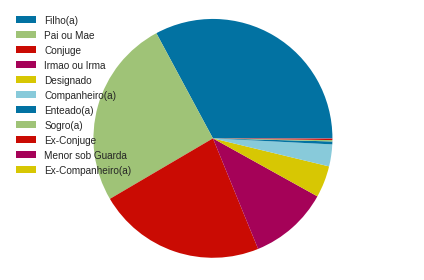

In [191]:
plt.pie(dependentes_maioresRF.Parentesco.value_counts());
plt.legend(labels=dependentes_maioresRF['Parentesco'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

####Analisando as contribuições destes participantes que têm 100% em Renda Fixa

In [192]:
contribuicao_maioresRF = pd.merge(maioresRF, contribuicao_ult, how='inner', on=['ID'])
contribuicao_maioresRF = contribuicao_maioresRF.drop(columns=['RendaFixa','DtVigencia_y'])
contribuicao_maioresRF = contribuicao_maioresRF.rename(columns={"DtVigencia_x": "DtVigencia"})
contribuicao_maioresRF.head()

,ID,DtVigencia,Contribuicao
0,5,2020-11-03,8.0
1,8,2020-11-03,12.0
2,9,2020-11-03,8.0
3,10,2020-11-03,8.0
4,12,2020-11-03,3.0


In [193]:
contribuicao_maioresRF.Contribuicao.describe()

count    2301.000000
mean        6.726206
std         3.254663
min         1.000000
25%         4.000000
50%         7.000000
75%         8.000000
max        35.000000
Name: Contribuicao, dtype: float64

In [194]:
contribuicao_maioresRF.Contribuicao.mode()

0    8.0
dtype: float64

In [195]:
contribuicao.Contribuicao.describe()

count    11415.000000
mean         6.899956
std          3.568717
min          1.000000
25%          4.000000
50%          7.000000
75%          8.000000
max         62.000000
Name: Contribuicao, dtype: float64

In [196]:
contribuicao.Contribuicao.mode()

0    8.0
dtype: float64

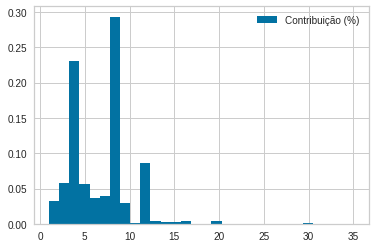

In [197]:
plt.hist(contribuicao_maioresRF['Contribuicao'], bins=30, label='Contribuição (%)', density=True)
plt.legend();

###Clusterização dos Participantes

In [198]:
grupo_Dummies.head()

,ID,M,F,SuperiorCompleto,SegGrauCompleto,PosGraduacao,SuperiorIncompleto,Mestrado,SegGrauIncompleto,PrimGrauCompleto,L1,L2,L3
0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


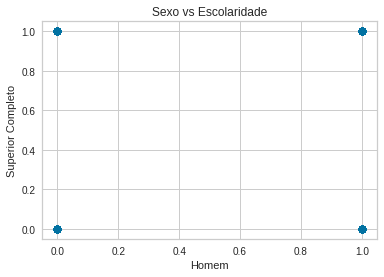

In [199]:
plt.scatter(x=grupo_Dummies['M'], y=grupo_Dummies['SuperiorCompleto'])
plt.title('Sexo vs Escolaridade')
plt.ylabel('Superior Completo')
plt.xlabel('Homem')
plt.show()

In [200]:
seed = 0
np.random.seed(seed)

In [201]:
kmeans = KMeans(n_clusters=4, random_state=seed)
kmeans = kmeans.fit(grupo_Dummies)

In [202]:
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [203]:
kmeans.cluster_centers_

array([[2.27700000e+03, 7.13434811e-01, 2.86565189e-01, 6.32693580e-01,
        2.21707478e-01, 8.40502978e-02, 5.16214428e-02, 4.63269358e-03,
        5.29450695e-03, 2.84060969e-17, 1.05228326e-01, 6.90933157e-01,
        2.03838518e-01],
       [5.29150000e+03, 7.56308101e-01, 2.43691899e-01, 6.26826029e-01,
        2.31739708e-01, 8.76494024e-02, 2.92164675e-02, 9.96015936e-03,
        1.39442231e-02, 6.64010624e-04, 7.37051793e-02, 7.31075697e-01,
        1.95219124e-01],
       [7.61000000e+02, 7.06114398e-01, 2.93885602e-01, 6.06180145e-01,
        2.34714004e-01, 1.21630506e-01, 2.49835634e-02, 5.91715976e-03,
        6.57462196e-03, 2.81892565e-17, 7.75805391e-02, 6.88362919e-01,
        2.34056542e-01],
       [3.78550000e+03, 7.50996016e-01, 2.49003984e-01, 6.75962815e-01,
        1.79946879e-01, 9.03054449e-02, 3.98406375e-02, 8.63213811e-03,
        6.64010624e-04, 4.64807437e-03, 7.56972112e-02, 7.09163347e-01,
        2.15139442e-01]])

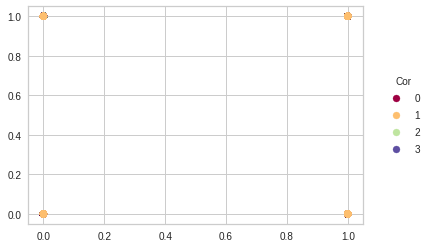

In [204]:
fig = plt.scatter(x=grupo_Dummies['M'], y=grupo_Dummies['L1'], c=kmeans.labels_, cmap='Spectral')
handles, labels = fig.legend_elements(prop="colors")
plt.legend(handles, labels, loc='center right', bbox_to_anchor=(1.2, 0.5), title='Cor')
plt.show()

In [205]:
wcss = []
davies_bouldin = []
K = range(2,10)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=seed)
  kmeans.fit(grupo_Dummies)
  wcss.append(kmeans.inertia_)
  davies_bouldin.append(davies_bouldin_score(grupo_Dummies, kmeans.labels_))

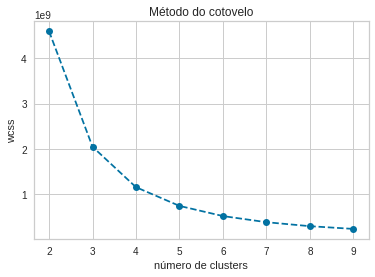

In [206]:
plt.plot(K, wcss, 'bo--')
plt.xlabel('número de clusters')
plt.ylabel('wcss')
plt.title('Método do cotovelo')
plt.show()

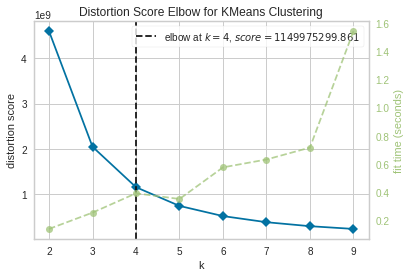

In [207]:
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(grupo_Dummies) 
visualizer.poof()

In [208]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

{0: 675, 1: 664, 2: 679, 3: 667, 4: 680, 5: 673, 6: 672, 7: 666, 8: 668}


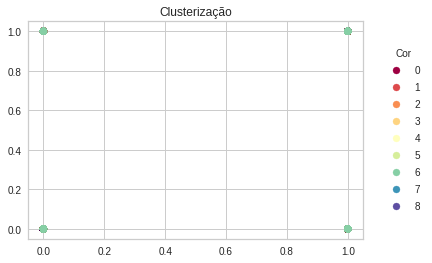

In [209]:
fig = plt.scatter(x=grupo_Dummies['M'], y=grupo_Dummies['L1'], c=kmeans.labels_, cmap='Spectral')

handles, labels = fig.legend_elements(prop="colors")
plt.legend(handles, labels, loc='center right', bbox_to_anchor=(1.2, 0.5), title='Cor')
plt.title('Clusterização')
plt.show()